<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [153]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [154]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

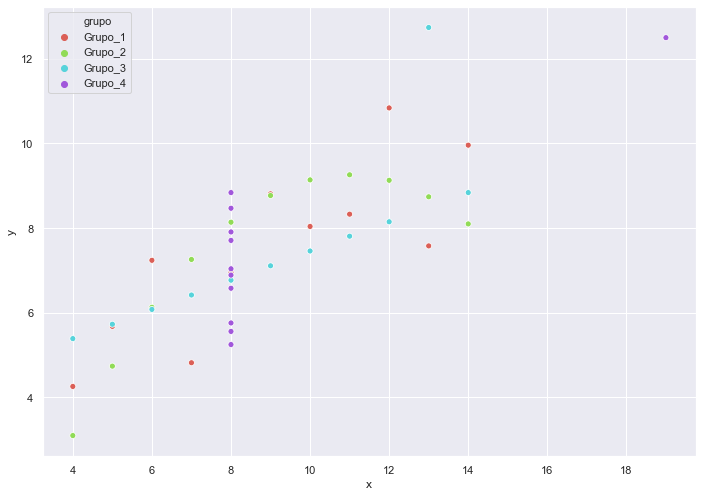

In [155]:
palette = sns.color_palette("hls", 4)

sns.scatterplot(
    x='x',
    y='y',
    hue='grupo',# color por Generation
    data=df,
    palette=palette
)

Se aprecia que cada grupo tiene un compartamiento diferente. En particular el grupo 1 parece oscilar aleatoriamente al rededor de cierta linea central o eje que esá bien marcado por el grupo 3. De la misma forma para el grupo 2 pero con una oscilación más regular. Por otro lado el grupo 4 parece ser constante para todo y, salvo un outlayer.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [156]:
df1=df[df['grupo']=='Grupo_1']
df1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [157]:
df2=df[df['grupo']=='Grupo_2']
df2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [158]:
df3=df[df['grupo']=='Grupo_3']
df3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [159]:
df4=df[ df['grupo']=='Grupo_4' ]
df4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Podemos observar que las 4 muestras presentan exactamente los mismos promedios y desviaciones estándar, sin embargo su comportamiento es totalmente distinto. Por ejemplo el grupo 4 tiene un comportamiento tal que para todos los valores de y registrados tenemos un mismo valor x salgo un outlayer.

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model1= LinearRegression() # Creando el modelo.
model1.fit(df1[['x']], df1['y'])
beta_0_1 = round(model1.intercept_,2)
beta_1_1 = round(model1.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
Y = {beta_0_1} + {beta_1_1}*X")

El mejor ajuste lineal viene dado por la recta: 

     Y = 3.0 + 0.5*X


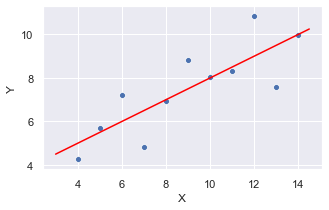

In [162]:
x1_range = np.arange(3, 15, 0.5)  
df_plot1 = pd.DataFrame({'x':x_range,
                        'y':[beta_0_1 + beta_1_1*n for n in x1_range]})
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='x', y='y', data= df_plot , ax=ax ,color="red")
sns.scatterplot(x='x', y='y', data=df1, ax=ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [150]:
model2 = LinearRegression() # Creando el modelo.
model2.fit(df2[['x']], df2['y'])
beta_0_2 = round(model2.intercept_,2)
beta_1_2 = round(model2.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
Y = {beta_0_2} + {beta_1_2}*X")

El mejor ajuste lineal viene dado por la recta: 

     Y = 3.0 + 0.5*X


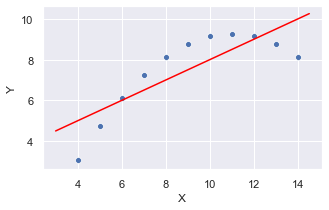

In [164]:
x2_range = np.arange(3, 15, 0.5)  
df_plot2 = pd.DataFrame({'x':x_range,
                        'y':[beta_0_2 + beta_1_2*n for n in x2_range]})
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='x', y='y', data= df_plot2 , ax=ax ,color="red")
sns.scatterplot(x='x', y='y', data=df2, ax=ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [112]:
model3 = LinearRegression() # Creando el modelo.
model3.fit(df3[['x']], df3['y'])
beta_0_3 = round(model3.intercept_,2)
beta_1_3 = round(model3.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
Y = {beta_0_3} + {beta_1_3}*X")

El mejor ajuste lineal viene dado por la recta: 

     Y = 3.0 + 0.5*X


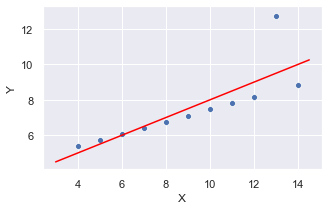

In [165]:
x3_range = np.arange(3, 15, 0.5)  
df_plot3 = pd.DataFrame({'x':x3_range,
                        'y':[beta_0_3 + beta_1_3*n for n in x3_range]})
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='x', y='y', data= df_plot3 , ax=ax ,color="red")
sns.scatterplot(x='x', y='y', data=df3, ax=ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [113]:
model4 = LinearRegression() # Creando el modelo.
model4.fit(df4[['x']], df4['y'])
beta_0_4 = round(model4.intercept_,2)
beta_1_4 = round(model4.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
Y = {beta_0_4} + {beta_1_4}*X")

El mejor ajuste lineal viene dado por la recta: 

     Y = 3.0 + 0.5*X


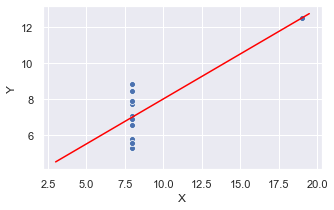

In [169]:
x4_range = np.arange(3, 20, 0.5)  
df_plot4 = pd.DataFrame({'x':x4_range,
                        'y':[beta_0_4 + beta_1_4*n for n in x4_range]})
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='x', y='y', data= df_plot4 , ax=ax ,color="red")
sns.scatterplot(x='x', y='y', data=df4, ax=ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [114]:
from metrics_regression import *
from sklearn.metrics import r2_score

In [121]:
df_temp1 = pd.DataFrame(
    {
        'y':df1['y'],
        'yhat': model1.predict(df1[['x']])
        }
)
df_metrics1 = summary_metrics(df_temp1)
df_metrics1['r2'] =  round(r2_score(df1['y'], model1.predict(df1[['x']])),4)
print('\nMetricas para x:\n')
print(df_metrics1)


Metricas para x:

      mae     mse    rmse    mape  maape   wmape   mmape   smape      r2
0  0.8374  1.2512  1.1185  0.1213  0.119  0.1116  0.1048  0.1167  0.6665


In [120]:
df_temp2 = pd.DataFrame(
    {
        'y':df2['y'],
        'yhat': model2.predict(df2[['x']])
        }
)
df_metrics2 = summary_metrics(df_temp2)
df_metrics2['r2'] =  round(r2_score(df2['y'], model2.predict(df2[['x']])),4)
print('\nMetricas para x:\n')
print(df_metrics2)


Metricas para x:

      mae     mse    rmse   mape   maape  wmape   mmape   smape      r2
0  0.9679  1.2524  1.1191  0.157  0.1504  0.129  0.1315  0.1438  0.6662


In [119]:
df_temp3 = pd.DataFrame(
    {
        'y':df3['y'],
        'yhat': model3.predict(df3[['x']])
        }
)
df_metrics3 = summary_metrics(df_temp3)
df_metrics3['r2'] =  round(r2_score(df3['y'], model3.predict(df3[['x']])),4)
print('\nMetricas para x:\n')
print(df_metrics3)


Metricas para x:

     mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.716  1.2506  1.1183  0.0797  0.0791  0.0955  0.0712  0.0814  0.6663


In [118]:
df_temp4 = pd.DataFrame(
    {
        'y':df4['y'],
        'yhat': model4.predict(df4[['x']])
        }
)
df_metrics4 = summary_metrics(df_temp4)
df_metrics4['r2'] =  round(r2_score(df4['y'], model4.predict(df4[['x']])),4)
print('\nMetricas para x:\n')
print(df_metrics4)


Metricas para x:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9027  1.2493  1.1177  0.1347  0.1324  0.1203  0.1167  0.1303  0.6667


Observamos que el valor r2 para cada regresión es casi el mismo para todos salvo por milésimas, aun así el comportamiento observado en los gráficos no es el mismo. En particular para el grupo 4 que tiene un comportamiento casi vertical. Se aprecia de los gráficos de puntos que el grupo 4 tiene un outlier lejos de los valores de 'x'.

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario. 

Dado que los grupos 1 y 2  tienen un comportamiento más aproximado a la recta se dejarán como tal y trabajaremos con los datos del grupo 3 y 4.

Para el grupo 3 eliminamos el valor más alto según el gráfico de puntos.

In [181]:
df31=df3[ df3['y']<12 ]
model5 = LinearRegression() # Creando el modelo.
model5.fit(df31[['x']], df31['y'])
beta_0_5 = round(model5.intercept_,2)
beta_1_5 = round(model5.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
Y = {beta_0_5} + {beta_1_5}*X")

El mejor ajuste lineal viene dado por la recta: 

     Y = 4.01 + 0.35*X


In [182]:
df_temp5 = pd.DataFrame(
    {
        'y':df31['y'],
        'yhat': model5.predict(df31[['x']])
        }
)
df_metrics5 = summary_metrics(df_temp5)
df_metrics5['r2'] =  round(r2_score(df31['y'], model5.predict(df31[['x']])),4)
print('\nMetricas para x:\n')
print(df_metrics5)


Metricas para x:

      mae  mse    rmse    mape   maape   wmape   mmape   smape   r2
0  0.0023  0.0  0.0028  0.0003  0.0003  0.0003  0.0003  0.0003  1.0


Para el grupo 4 eliminaremos el punto 'x' que está más alejado.

In [172]:
df41=df4[ df4['x']<19 ] #aplicamos máscara

In [176]:
model6 = LinearRegression() # Creando el modelo.
model6.fit(df41[['x']], df41['y'])
beta_0_6 = round(model6.intercept_,2)
beta_1_6 = round(model6.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
Y = {beta_0_6} + {beta_1_6}*X")

El mejor ajuste lineal viene dado por la recta: 

     Y = 7.0 + 0.0*X


In [189]:
df_temp6 = pd.DataFrame(
    {
        'y':df41['y'],
        'yhat': model6.predict(df41[['x']])
        }
)
df_metrics6 = summary_metrics(df_temp6)
df_metrics6['r2'] =  round(r2_score(df41['y'], model6.predict(df41[['x']])),4)
print('\nMetricas para x:\n')
print(df_metrics6)


Metricas para x:

     mae     mse    rmse    mape   maape   wmape   mmape   smape   r2
0  0.993  1.3742  1.1723  0.1482  0.1456  0.1418  0.1283  0.1434  0.0


Vemos que al eliminar el elemento x=19, nuestra regresión corresponde a una recta horizontal y=7.